In [64]:
%load_ext autoreload
%autoreload 2

from data_setup import *
ds=data_setup()

from logic.analysis.analysis import AnalysisCharts

an=AnalysisCharts()

compvars=['glycated_haemoglobin_hba1c_f30750_0_0','neutrophill_count_f30140_0_0',
          'creactive_protein_f30710_0_0','NLR','lymphocyte_count_f30120_0_0','monocyte_count_f30130_0_0','basophill_count_f30160_0_0']



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

def ttest(df,var,depvar='polyneuropathy'):
    
    df1=df.loc[pd.notnull(df[var]),[var,depvar]]
    ttest_vals=stats.ttest_ind(df1[(df1[depvar]==1)][var], 
               df1[(df1[depvar]==0)][var])

    return ttest_vals

def runplots_static(df,depvar='poly_chronic',fig_name='diabetes_inflamm_polychronicpain',compvars=compvars):
    k=len(compvars)
    fig = plt.figure(figsize=(25, 10*k))
    grid = plt.GridSpec(k, 2, hspace=0.45, wspace=0.3)

    for j,v in enumerate(compvars):
        for i in range(2):
            ax=fig.add_subplot(grid[j, i])

            df_diab2_use=df.loc[df['sex_f31_0_0']==i,]
            ax=sns.boxplot(x=df_diab2_use[depvar],y=df_diab2_use[v],showfliers = False,color='skyblue')
            plt.xticks(fontsize='35')
            plt.yticks(fontsize='35')
            plt.title(str(ml.mapvar(v)), fontsize='35')

            pval=str(round(list(ttest(df_diab2_use,v,depvar))[1],5))
            rangevars=df_diab2_use[v].quantile(0.75)-df_diab2_use[v].quantile(0.25)
            plt.text(0,rangevars,'p value '+pval,fontsize=24)


    plt.savefig(an.path_figures_pain+'fig_'+an.date_run+"_"+fig_name+'.jpg', dpi=300,bbox_inches='tight')
    plt.show()
    
    return None

from scipy import stats

In [69]:
df_brain=pd.read_parquet('../../data/ukb_brain2.parquet')

In [75]:
df_brain['eid']=df_brain['eid'].astype(str)

In [91]:
df_brain

,eid,waist_circumference_f48_2_0,hip_circumference_f49_2_0,standing_height_f50_2_0,seated_height_f51_2_0,forced_vital_capacity_fvc_f3062_2_0,forced_expiratory_volume_in_1second_fev1_f3063_2_0,weight_manual_entry_f3160_2_0,ankle_spacing_width_left_f4100_2_0,heel_broadband_ultrasound_attenuation_left_f4101_2_0,...,vitamin_c_f100015_2_0,potassium_f100016_2_0,magnesium_f100017_2_0,retinol_f100018_2_0,carotene_f100019_2_0,vitamin_d_f100021_2_0,alcohol_f100022_2_0,starch_f100023_2_0,calcium_f100024_2_0,vitamin_e_f100025_2_0
1,1000023,80.0,102.0,173.0,134.0,2.53,1.95,NaN,39.1936,70.1445,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,1000152,95.5,101.0,171.5,132.5,4.19,1.18,NaN,45.1026,82.3009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,1000169,88.0,105.0,158.0,125.0,2.86,2.30,NaN,42.7919,67.3257,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,1000197,88.0,100.0,183.0,135.0,6.33,4.78,NaN,NaN,NaN,...,406.80,5561.25,479.81,507.33,5760.10,1.00,0.00,73.94,1813.95,20.23
24,1000250,83.0,105.0,167.3,130.2,2.92,2.23,NaN,42.1040,58.5259,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502375,6024897,116.0,112.0,181.0,140.0,3.89,2.83,NaN,NaN,NaN,...,95.51,6095.50,478.61,442.29,3438.21,3.39,35.25,161.01,1852.34,15.27
502379,6024937,90.0,101.0,181.0,142.0,3.87,3.04,NaN,46.0022,75.2181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502387,6025017,87.0,102.0,164.5,135.5,3.05,2.48,NaN,44.3088,71.4213,...,210.27,3537.59,310.78,204.92,3006.78,0.29,0.00,120.46,736.82,5.75
502399,6025139,102.0,97.0,182.5,145.0,NaN,NaN,98.9,48.3834,76.9302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Diabetes dataset creation

In [2]:
icd10_diabs=ds.search_icd(strings='diabetes',non_strings='family|screening|insipidus|pregnancy',string_pat=True)[0]

In [20]:
df_diab=dp.data_merge_dis(remwords='xxxxx',disease='diabetes',icd10s=icd10_diabs,outfile=None,use_icd10=True,
                 strcont=True,bef=True,years=0)

0
Total ohe variables = 1 


#### diabetic neuropathy and diabetic neuropathy with pain

In [53]:
df_neur1=pd.read_parquet('../../data/ukb_tp0.parquet',columns=['eid','ever_had_diabetic_neuropathy_f120079_0_0',
                                                            'pain_or_discomfort_all_over_the_body_in_the_last_3_months_f120021_0_0',
                                                           'troubled_by_pain_or_discomfort_present_for_more_than_3_months_f120019_0_0',
                                                              'diabetes_diagnosed_by_doctor_f2443_0_0',
                                                              'ever_had_diabetes_type_i_or_type_ii_f120007_0_0'])

In [56]:
for c in [c for c in df_neur1.columns if c!='eid']:
    display(df_neur1[c].value_counts())

 0.0      27411
 1.0       1328
-121.0      629
-818.0        5
Name: ever_had_diabetic_neuropathy_f120079_0_0, dtype: int64

 0.0      83972
 1.0       9880
-121.0      194
-818.0       13
Name: pain_or_discomfort_all_over_the_body_in_the_last_3_months_f120021_0_0, dtype: int64

 1.0      94059
 0.0      72733
-121.0      384
-818.0       26
Name: troubled_by_pain_or_discomfort_present_for_more_than_3_months_f120019_0_0, dtype: int64

 0.0    473401
 1.0     26395
-1.0      1280
-3.0       404
Name: diabetes_diagnosed_by_doctor_f2443_0_0, dtype: int64

 0.0      155647
 1.0       10855
-121.0       663
-818.0        37
Name: ever_had_diabetes_type_i_or_type_ii_f120007_0_0, dtype: int64

In [58]:
mask=(df_neur1['diabetes_diagnosed_by_doctor_f2443_0_0']==0)&(df_neur1['ever_had_diabetic_neuropathy_f120079_0_0']==1)
df_neur1.loc[mask,'ever_had_diabetes_type_i_or_type_ii_f120007_0_0'].sum()

-44.0

In [30]:
df_model=pd.read_parquet(dp.path+'df_model.parquet')

In [59]:
mask=(df_neur1['diabetes_diagnosed_by_doctor_f2443_0_0']==1)|(df_neur1['ever_had_diabetic_neuropathy_f120079_0_0']==1)
eids_diab=list(df_neur1.loc[mask,'eid'].astype(str))
eids_neur_path=list(df_neur1.loc[df_neur1['ever_had_diabetic_neuropathy_f120079_0_0']==1,'eid'].astype(str))
eids_neur_path_pain=list(df_neur1.loc[(df_neur1['ever_had_diabetic_neuropathy_f120079_0_0']==1)&
                                      (df_neur1['troubled_by_pain_or_discomfort_present_for_more_than_3_months_f120019_0_0']==1),
                                     'eid'].astype(str))

In [32]:
df_model.loc[df_model['eid'].astype(str).isin(eids_neur_path),].shape[0]

1328

In [34]:
[c for c in df_model.columns if 'neutrophill' in c]

['neutrophill_count_f30140_0_0',
 'neutrophill_count_freezethaw_cycles_f30141_0_0',
 'neutrophill_percentage_f30200_0_0',
 'neutrophill_percentage_freezethaw_cycles_f30201_0_0']

In [21]:
ctrl_eids=[c for c in df_diab['eid'] if c not in eids_diab and c not in eids_neur_path]

In [28]:
len(eids_neur_path_pain)

1050

In [88]:
df_neur1['eid']=df_neur1['eid'].astype(str)
df_diab_neur['eid']=df_diab_neur['eid'].astype(str)
df_diab_neur2['eid']=df_diab_neur2['eid'].astype(str)

In [90]:
df_diab_neur2.loc[df_diab_neur2['eid'].isin(df_brain['eid']),'neuro'].sum()

213

In [47]:
df_diab_neur=df_model.loc[df_model['eid'].astype(str).isin(eids_neur_path),]
df_diab_neur['neuro_pain']=0
df_diab_neur.loc[df_diab_neur['eid'].astype(str).isin(eids_neur_path_pain),'neuro_pain']=1
#df_diab_neur.drop(columns=['time_since_diabetes','diabetes'],inplace=True)
df_diab_neur['NLR']=df_diab_neur['neutrophill_count_f30140_0_0']/df_diab_neur['lymphocyte_count_f30120_0_0']

In [60]:
df_diab_neur2=df_model.loc[df_model['eid'].astype(str).isin(eids_neur_path)|df_model['eid'].astype(str).isin(eids_diab),]
df_diab_neur2['neuro']=0
df_diab_neur2.loc[df_diab_neur2['eid'].astype(str).isin(eids_neur_path),'neuro']=1
#df_diab_neur.drop(columns=['time_since_diabetes','diabetes'],inplace=True)
df_diab_neur2['NLR']=df_diab_neur2['neutrophill_count_f30140_0_0']/df_diab_neur2['lymphocyte_count_f30120_0_0']

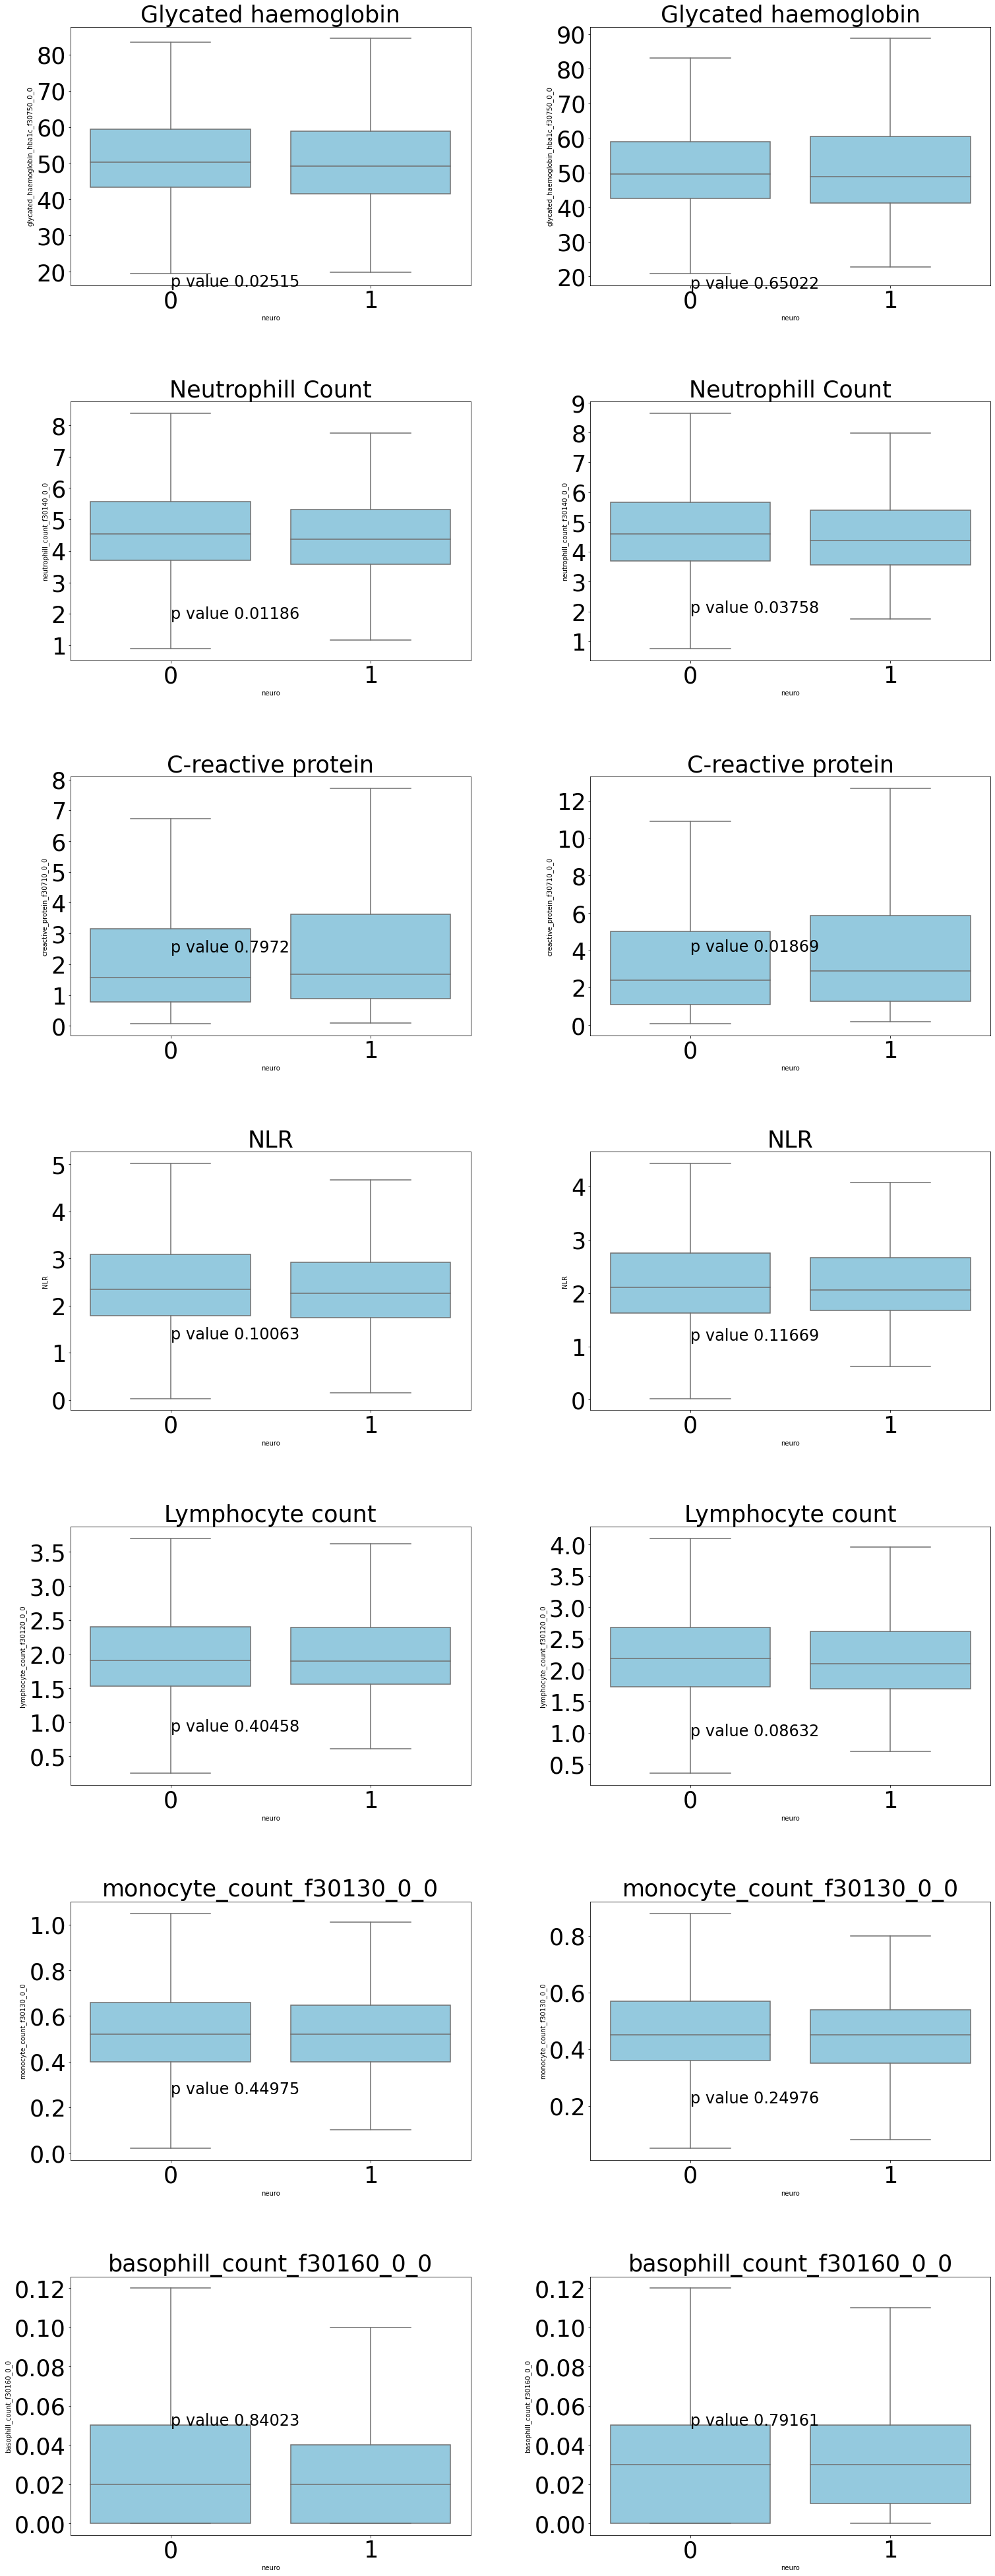

In [68]:
runplots_static(df=df_diab_neur2,depvar='neuro',fig_name='diabetes_inflamm_ neuro comp diab',compvars=compvars)

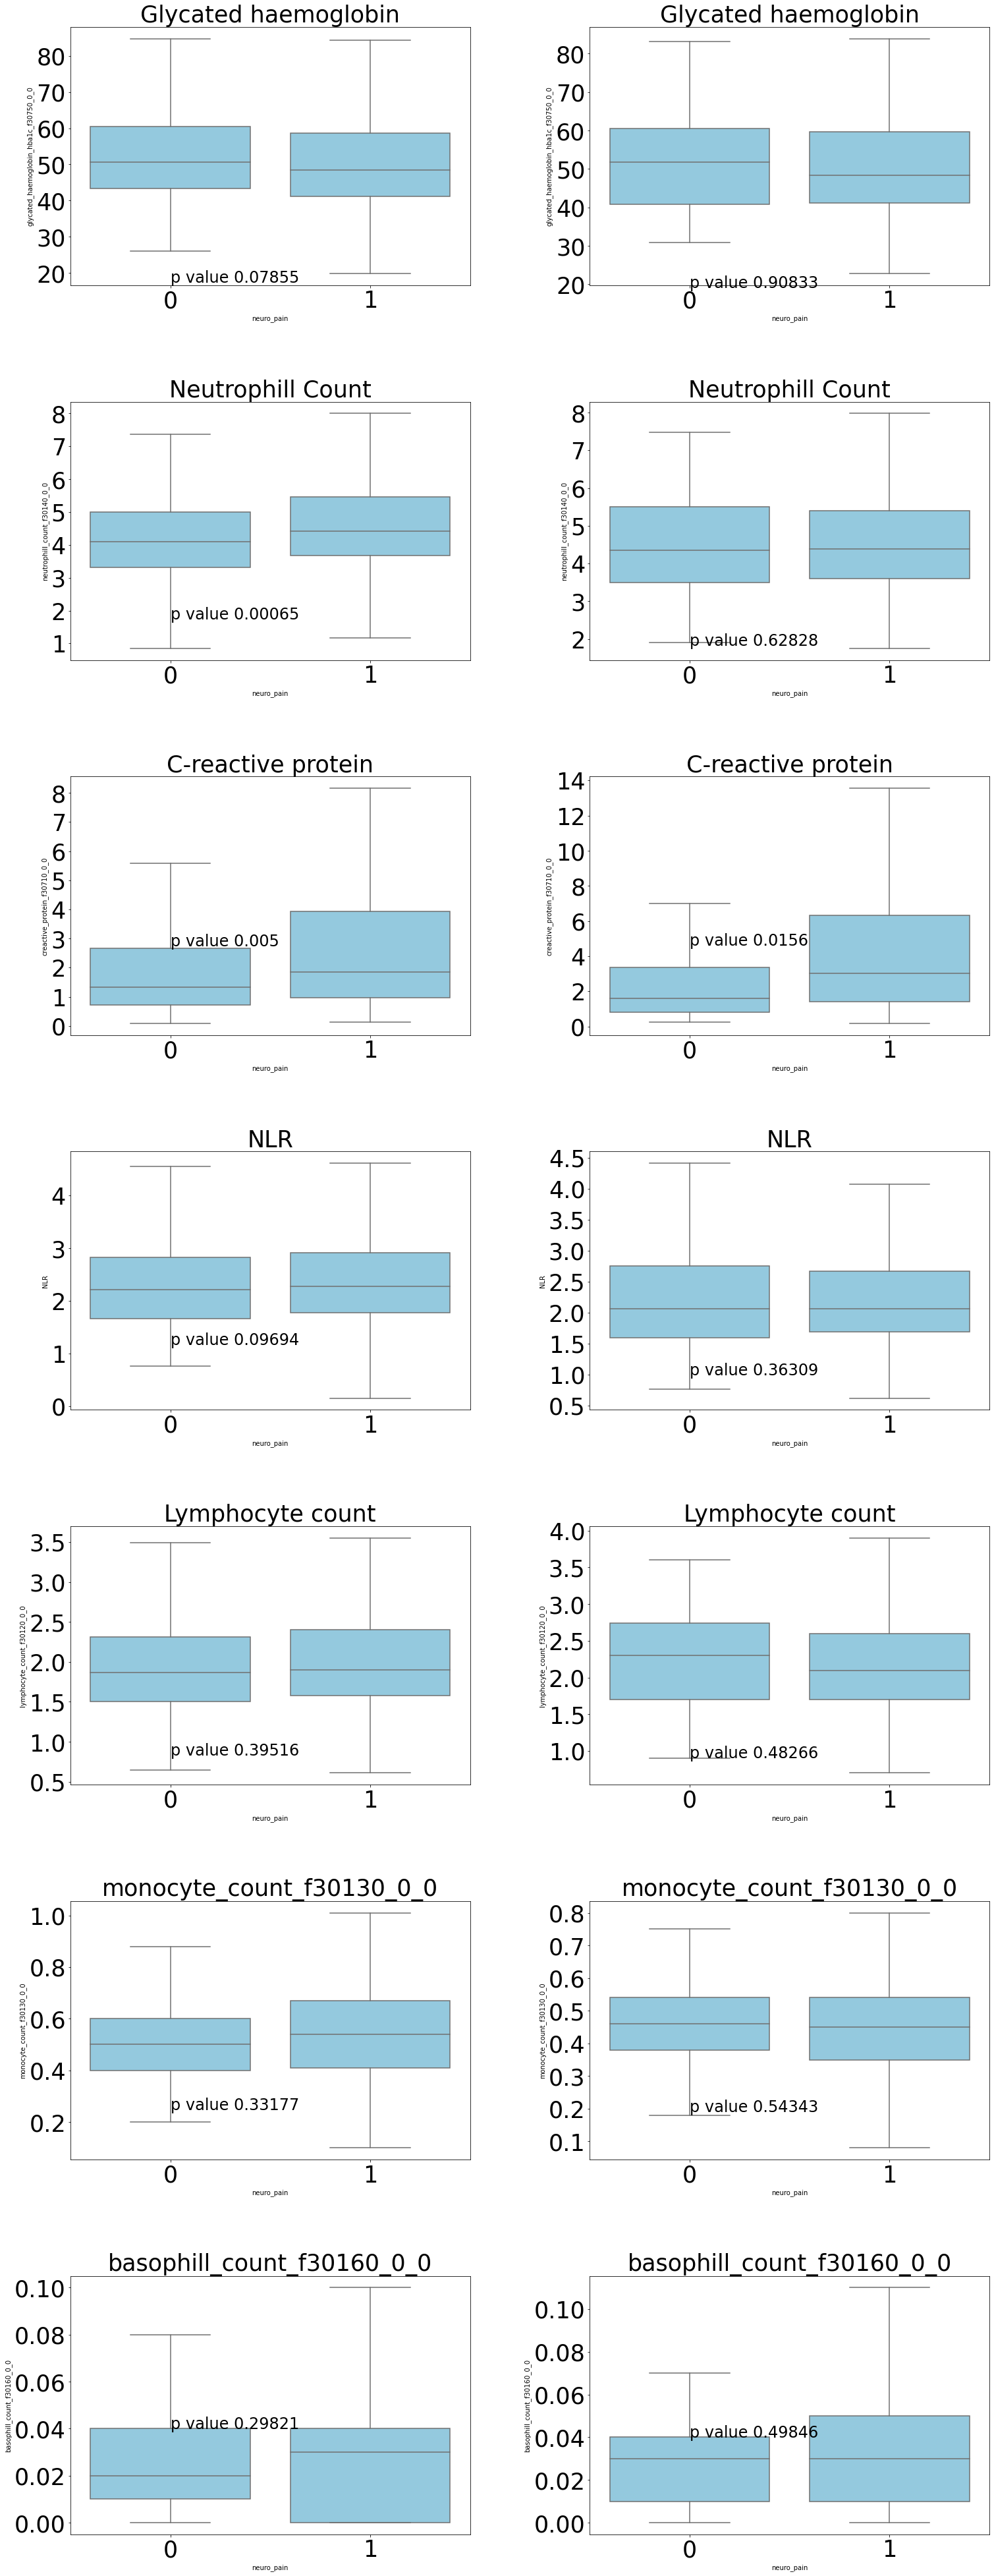

In [67]:
runplots_static(df=df_diab_neur,depvar='neuro_pain',fig_name='diabetes_inflamm_neurpain comp dabneur',compvars=compvars)

Total neuro in data: 1328
Total neuro in data: 1328
3


<Figure size 2000x3000 with 0 Axes>

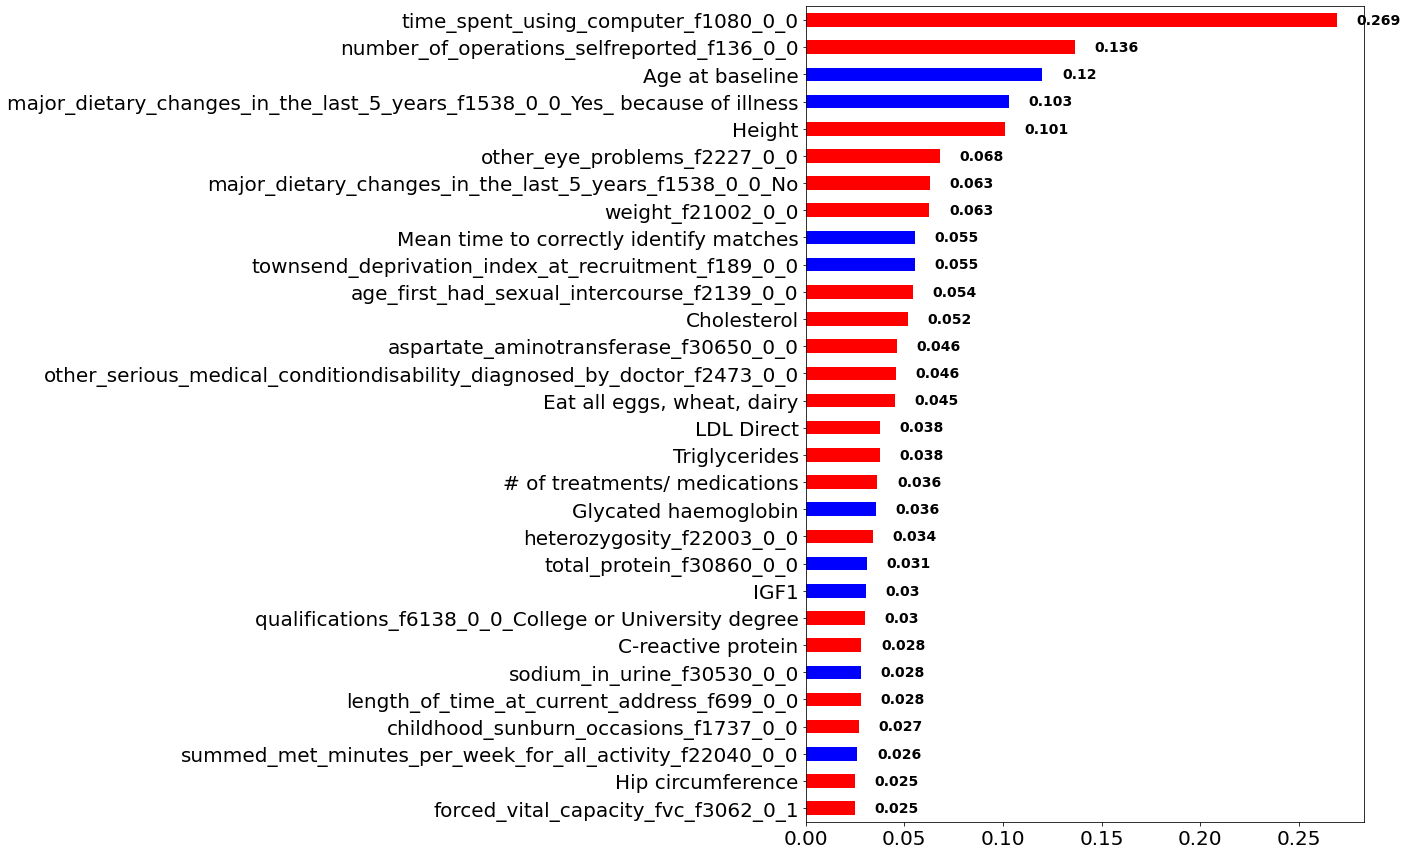

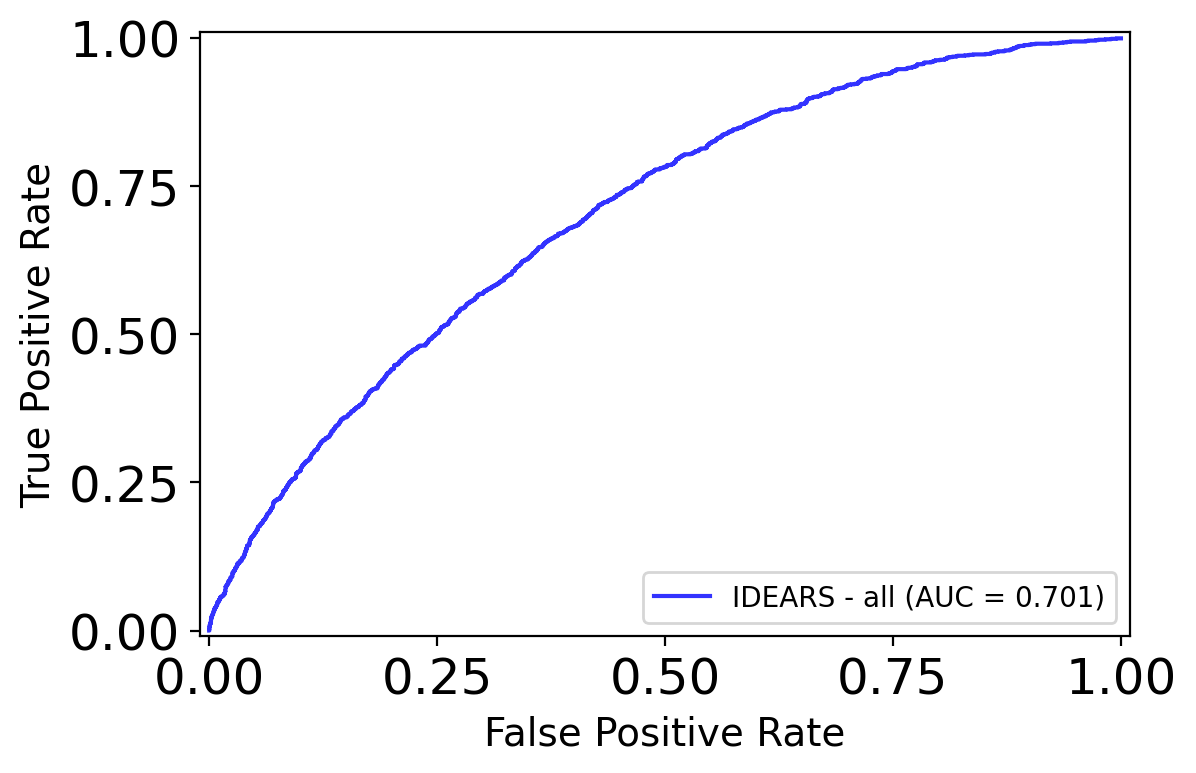

[0.7011370028305997]

In [62]:
shap_poly_diab=ds.process_run(df=df_diab_neur2,depvar='neuro',resize=1,resizeratio=5,remwords='diabetes')
feats_all=ml.shapgraphs_tuple(shap_poly_diab,max_disp=30,figname='SHAP IDEARS ENTIRE COHORT polyneuro 2 no pain in diabetes')
ml.ROCAUC_tuples(df_out_list=[shap_poly_diab[2]],labels=['IDEARS - all'],cols=['blue'],figname='ROCAUC polyneuro 2 no pain in diabetes')

In [41]:
[c for c in df_diab_neur.columns]

['eid',
 'worrier_anxious_feelings_f1980_0_0',
 'fracturedbroken_bones_in_last_5_years_f2463_0_0',
 'fedup_feelings_f1960_0_0',
 'snoring_f1210_0_0',
 'breastfed_as_a_baby_f1677_0_0',
 'ever_had_bowel_cancer_screening_f2345_0_0',
 'diabetes_diagnosed_by_doctor_f2443_0_0',
 'adopted_as_a_child_f1767_0_0',
 'chest_pain_or_discomfort_f2335_0_0',
 'sensitivity_hurt_feelings_f1950_0_0',
 'tense_highly_strung_f1990_0_0',
 'worry_too_long_after_embarrassment_f2000_0_0',
 'suffer_from_nerves_f2010_0_0',
 'loneliness_isolation_f2020_0_0',
 'guilty_feelings_f2030_0_0',
 'risk_taking_f2040_0_0',
 'wheeze_or_whistling_in_the_chest_in_last_year_f2316_0_0',
 'seen_a_psychiatrist_for_nerves_anxiety_tension_or_depression_f2100_0_0',
 'seen_doctor_gp_for_nerves_anxiety_tension_or_depression_f2090_0_0',
 'irritability_f1940_0_0',
 'longstanding_illness_disability_or_infirmity_f2188_0_0',
 'miserableness_f1930_0_0',
 'mood_swings_f1920_0_0',
 'mother_still_alive_f1835_0_0',
 'father_still_alive_f1797_0_0

In [48]:
df_diab_neur['neuro_pain'].sum()

1050

Total neuro_pain in data: 1050
Total neuro_pain in data: 1050
3


<Figure size 2000x3000 with 0 Axes>

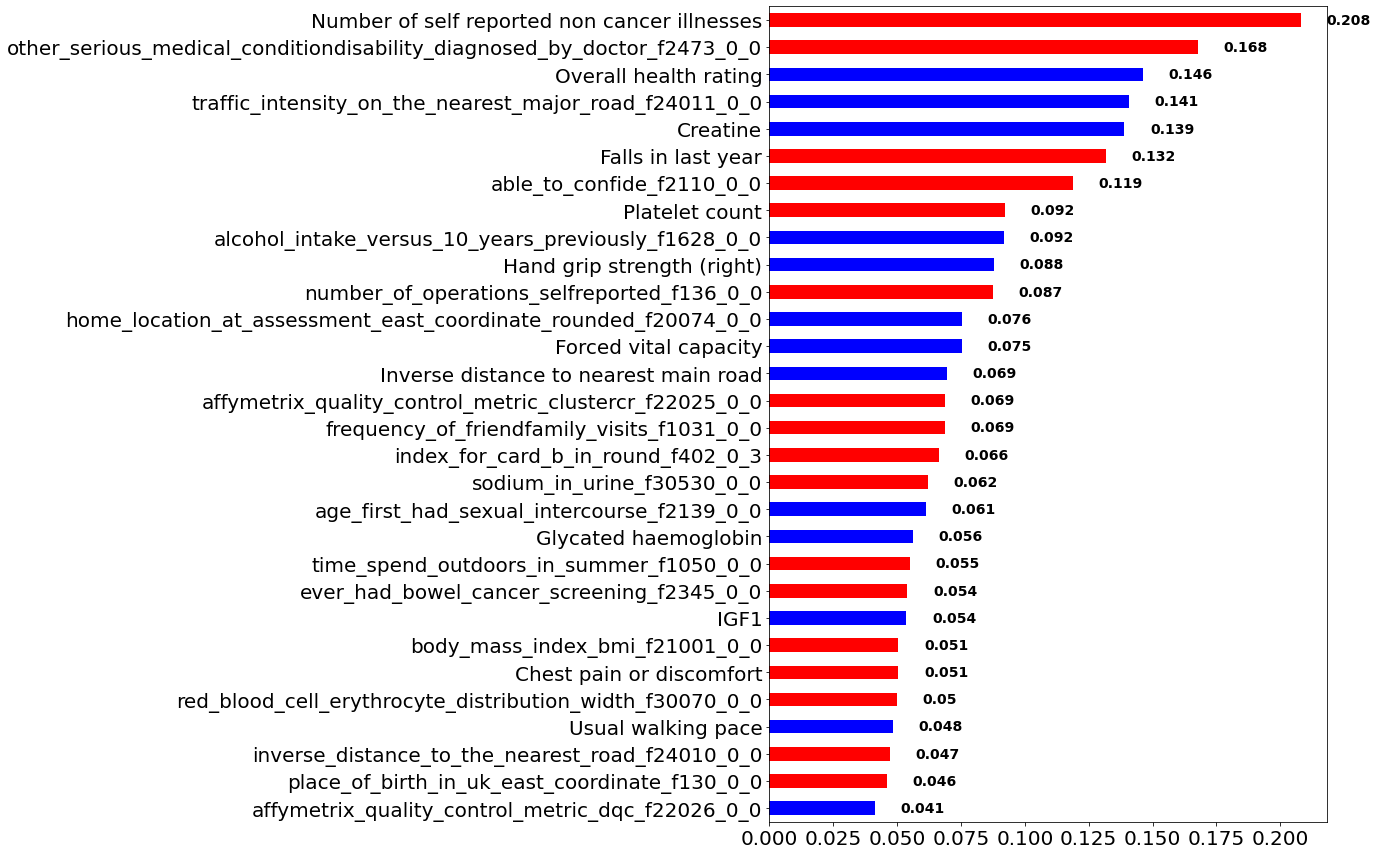

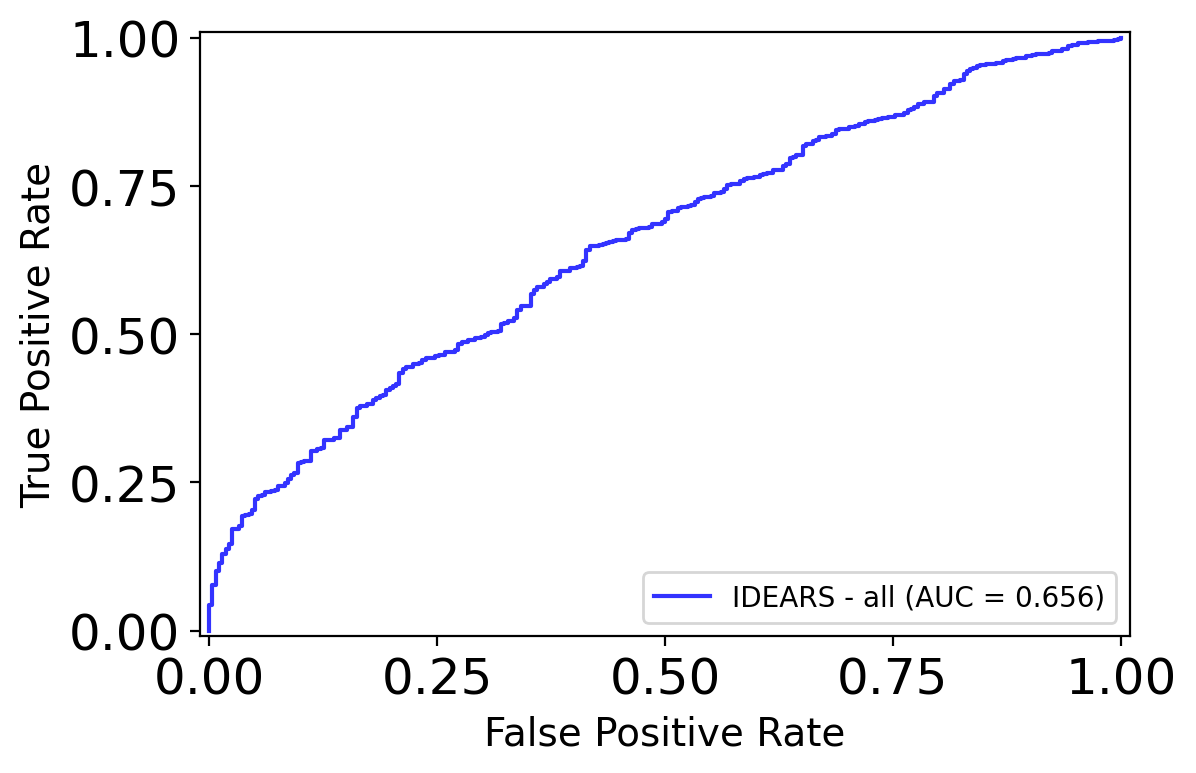

[0.6564748201438849]

In [49]:
shap_poly_diab=ds.process_run(df=df_diab_neur,depvar='neuro_pain',resize=0,resizeratio=5,remwords='diabetes')
feats_all=ml.shapgraphs_tuple(shap_poly_diab,max_disp=30,figname='SHAP IDEARS ENTIRE COHORT polyneuro 2 no pain in diabetes')
ml.ROCAUC_tuples(df_out_list=[shap_poly_diab[2]],labels=['IDEARS - all'],cols=['blue'],figname='ROCAUC polyneuro 2 no pain in diabetes')

In [15]:
df_diab2=df_diab.loc[df_diab['eid'].isin(eids_diab),]
df_diab.drop(columns=['time_since_diabetes','diabetes'],inplace=True)
df_diab['NLR']=df_diab['neutrophill_count_f30140_0_0']/df_diab['lymphocyte_count_f30120_0_0']

#### Controls versus diabetic neuropathy

In [16]:
df_diab.loc[df_diab['eid'].isin(eids_neur_path_pain),].shape[0]

436